In [1]:
s="Hello World"
print(s.lower()) #소문자로 변환
print(s.upper()) #대문자로 변환

hello world
HELLO WORLD


In [2]:
import re #정규 표현식 모듈

#정규표현식 숫자를 찾아내는 패턴, + 반복
p=re.compile("[0-9]+") 
#문장에 포함된 숫자가 제거됨
result=p.sub("","2019년 들어 서울 지역의 부동산 가격이 30% 하락했습니다.")
result

'년 들어 서울 지역의 부동산 가격이 % 하락했습니다.'

In [8]:
def clean_text(input_data):
    p=re.compile("[0-9_!',.@#$%^&*]") #정규표현식 패턴
    result=p.sub("",input_data) #문장에서 패턴을 찾아서 지움
    return result

txt="""94년 이후 처음…中, 외환시장 개입 통해 통화절하 오랜 역사

IMF와 관여할 것…시정요구 후 조달계약제한 등 구체조치 가능

'1달러=7위안' 돌파하자 환율 무기화 판단…미중 위험한 국면
"""
print(txt)
print("---------------")
print(clean_text(txt))

94년 이후 처음…中, 외환시장 개입 통해 통화절하 오랜 역사

IMF와 관여할 것…시정요구 후 조달계약제한 등 구체조치 가능

'1달러=7위안' 돌파하자 환율 무기화 판단…미중 위험한 국면

---------------
년 이후 처음…中 외환시장 개입 통해 통화절하 오랜 역사

IMF와 관여할 것…시정요구 후 조달계약제한 등 구체조치 가능

달러=위안 돌파하자 환율 무기화 판단…미중 위험한 국면



In [13]:
#불용어 제거

#분석할 키워드 목록
words=["추석","연휴","민족","대이동","시작","늘어","교통량",
      "자동차","나타","것","기자"]

#불용어 사전
stopwords=["늘어","나타","것","기자"]

#키워드 목록에서 불용어를 제거한 리스트
[i for i in words if i not in stopwords]

['추석', '연휴', '민족', '대이동', '시작', '교통량', '자동차']

In [14]:
#불용어 사전 다운로드 (한국어 lib는 없다..)
import nltk #자연어 처리 패키지
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords

words=["chief","justice","roberts",",",".","1234","of","the",
      "thank","you","and","or","not"]

#print(stopwords.words("english"))

print([w for w in words if not w in stopwords.words("english")])

['chief', 'justice', 'roberts', ',', '.', '1234', 'thank']


In [16]:
#어근,어미 정보 다운로드
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
#어근 동일화 처리(stemming)
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stm=PorterStemmer()
txt="cook cooker cooking cooks ingcookery"
#txt="python pythons pythoner Python Pythonweb Pythones"
words=word_tokenize(txt) #문장에서 단어 구분
#print(words)
for w in words:
    print(stm.stem(w),end=" ")

cook cooker cook cook ingcookeri 

In [21]:
from nltk.stem.lancaster import LancasterStemmer

stm=LancasterStemmer()
txt="cook cooker cooking cooks ingcookery"
#txt="python pythons pythoner Python Pythonweb Pythones"
words=word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

cook cook cook cook ingcookery 

In [22]:
from nltk.stem.regexp import RegexpStemmer

stm=RegexpStemmer("ing") # 문장에 포함된 ing를 제거
print(stm.stem("cooking"))
print(stm.stem("cookery"))
print(stm.stem("ingcook"))

cook
cookery
cook


In [23]:
stm=RegexpStemmer("python") #문장에 포함된 python을 제거
txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

ing s Python ers ed 

In [24]:
#바이그램(2글자)
txt="Hello"
for i in range(len(txt)-1):
    print(txt[i], txt[i+1], sep="")

He
el
ll
lo


In [41]:
#트라이그램(3글자)
txt="Hello"
for i in range(len(txt)-2):
    print(txt[i], txt[i+1], txt[i+2], sep="")

Hel
ell
llo


In [42]:
#단어 단위
txt="this is python script"
words=txt.split() #공백을 기준으로 문자열을 나누어 리스트로 저장
print(words)
for i in range(len(words)-1):
    print(words[i],words[i+1])

['this', 'is', 'python', 'script']
this is
is python
python script


In [30]:
#zip 함수를 이용한 n-gram
txt="hello"
print(txt[1:])
two_gram=zip(txt, txt[1:])
print(list(two_gram))

for i in two_gram:
    print(i[0], i[1], sep="")

ello
[('h', 'e'), ('e', 'l'), ('l', 'l'), ('l', 'o')]


In [31]:
txt="this is python script"
words=txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [32]:
from nltk import ngrams

sentence="I love you. Good morning. Good bye."
grams=ngrams(sentence.split(), 2) #two-gram(바이그램)
for gram in grams:
    print(gram, end=" ")

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [34]:
sentence="I love you. Good morning. Good bye."
grams=ngrams(sentence.split(), 3) #트라이그램
for gram in grams:
    print(gram, end=" ")

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

In [37]:
#konlpy 한글 텍스트 분석을 지원하는 패키지
from konlpy.tag import Hannanum
han=Hannanum() #한나눔 분석기
txt="""
이날 오전 10시 26분 현재 아시아 주요국 주가는 전날에 이어 일제히 하락하며 장을 시작했다.
중국 상하이종합지수는 전날보다 1.58% 떨어진 2,776.99를 기록했다.
선전종합지수는 1,488.91로 1.87% 하락했다.
홍콩 항셍지수와 대만 자취안 지수는 각각 2.60%와 1.66% 떨어졌다.
일본 닛케이 225 지수는 전날 1.74% 하락 마감한 데 이어 현재 2.05% 떨어진 20,295.29를 기록했다.
"""
print(han.morphs(txt)) #형태소 분석

['이날', '오전', '10시', '26분', '현재', '아시아', '주요국', '주가', '는', '전날', '에', '이', '이', '어', '일제히', '하락', '하', '며', '장', '을', '시작', '하', '었다', '.', '중국', '상하이종합지수', '는', '전날', '보다', '1.58', '%', '떨', '어', '지', 'ㄴ', '2,776', '.', '99', '를', '기록', '하', '었다', '.', '선전종합지수', '는', '1,488', '.', '91', '로', '1.87', '%', '하락', '하', '었다', '.', '홍콩', '항셍지수', '와', '대', '어', '말', 'ㄴ', '자취안', '지수', '는', '각각', '2.', '60', '%', '와', '1.66', '%', '떨', '어', '지', '었다', '.', '일본', '닛케', '이', '225', '지수', '는', '전날', '1.74', '%', '하락', '마감', '하', 'ㄴ', '데', '이', '이', '어', '현재', '2.05', '%', '떨', '어', '지', 'ㄴ', '20,295', '.', '29', '를', '기록', '하', '었다', '.']


In [38]:
print(han.nouns(txt)) #명사 추출

['이날', '오전', '10시', '26분', '현재', '아시아', '주요국', '주가', '전날', '이', '하락', '장', '시작', '중국', '상하이종합지수', '전날', '1.58', '2,776', '99', '기록', '선전종합지수', '1,488', '91', '1.87', '하락', '홍콩', '항셍지수', '자취안', '지수', '2.', '60', '1.66', '일본', '닛케', '225', '지수', '전날', '1.74', '하락', '마감', '데', '이', '2.05', '20,295', '29', '기록']


In [39]:
print(han.pos(txt)) #형태소와 품사

[('이날', 'N'), ('오전', 'N'), ('10시', 'N'), ('26분', 'N'), ('현재', 'N'), ('아시아', 'N'), ('주요국', 'N'), ('주가', 'N'), ('는', 'J'), ('전날', 'N'), ('에', 'J'), ('이', 'N'), ('이', 'J'), ('어', 'E'), ('일제히', 'M'), ('하락', 'N'), ('하', 'X'), ('며', 'E'), ('장', 'N'), ('을', 'J'), ('시작', 'N'), ('하', 'X'), ('었다', 'E'), ('.', 'S'), ('중국', 'N'), ('상하이종합지수', 'N'), ('는', 'J'), ('전날', 'N'), ('보다', 'J'), ('1.58', 'N'), ('%', 'S'), ('떨', 'P'), ('어', 'E'), ('지', 'P'), ('ㄴ', 'E'), ('2,776', 'N'), ('.', 'S'), ('99', 'N'), ('를', 'J'), ('기록', 'N'), ('하', 'X'), ('었다', 'E'), ('.', 'S'), ('선전종합지수', 'N'), ('는', 'J'), ('1,488', 'N'), ('.', 'S'), ('91', 'N'), ('로', 'J'), ('1.87', 'N'), ('%', 'S'), ('하락', 'N'), ('하', 'X'), ('었다', 'E'), ('.', 'S'), ('홍콩', 'N'), ('항셍지수', 'N'), ('와', 'J'), ('대', 'P'), ('어', 'E'), ('말', 'P'), ('ㄴ', 'E'), ('자취안', 'N'), ('지수', 'N'), ('는', 'J'), ('각각', 'M'), ('2.', 'N'), ('60', 'N'), ('%', 'S'), ('와', 'J'), ('1.66', 'N'), ('%', 'S'), ('떨', 'P'), ('어', 'E'), ('지', 'P'), ('었다', 'E'), ('.', 'S'), ('일본', 'N

In [40]:
from konlpy.tag import Kkma 
kkm=Kkma() #꼬꼬마 분석기
print(kkm.morphs(txt)) #형태소 분석

['이날', '오전', '10', '시', '26', '분', '현재', '아시아', '주요국', '주가', '는', '전날', '에', '잇', '어', '일제히', '하락', '하', '며', '장', '을', '시작하', '었', '다', '.', '중국', '상하이', '종합', '지수', '는', '전날', '보다', '1.58', '%', '떨어지', 'ㄴ', '2,776.99', '를', '기록하', '었', '다', '.', '선전', '종합', '지수', '는', '1,488.91', '로', '1.87', '%', '하락', '하', '었', '다', '.', '홍', '콩', '항셍지수', '와', '대', '만', '자취', '안', '지수', '는', '각각', '2.60', '%', '오', '아', '1.66', '%', '떨어지', '었', '다', '.', '일본', '닛', '케이', '225', '지수', '는', '전날', '1.74', '%', '하락', '마감', '하', 'ㄴ', '데', '잇', '어', '현재', '2.05', '%', '떨어지', 'ㄴ', '20,295.29', '를', '기록하', '었', '다', '.']


In [41]:
print(kkm.nouns(txt)) #명사 추출

['이날', '오전', '10', '10시', '시', '26', '26분', '분', '아시아', '주요국', '주가', '전날', '하락', '장', '중국', '상하이', '상하이종합지수', '종합', '지수', '1.58', '2,776.99', '선전', '선전종합지수', '1,488.91', '1.87', '홍', '홍콩', '콩', '항셍지수', '대', '자취', '자취안', '안', '2.60', '1.66', '일본', '닛', '닛케이', '케이', '225', '1.74', '마감', '데', '현재', '2.05', '20,295.29']


In [42]:
print(kkm.pos(txt)) #품사 태깅

[('이날', 'NNG'), ('오전', 'NNG'), ('10', 'NR'), ('시', 'NNM'), ('26', 'NR'), ('분', 'NNM'), ('현재', 'MAG'), ('아시아', 'NNG'), ('주요국', 'NNG'), ('주가', 'NNG'), ('는', 'JX'), ('전날', 'NNG'), ('에', 'JKM'), ('잇', 'VV'), ('어', 'ECD'), ('일제히', 'MAG'), ('하락', 'NNG'), ('하', 'XSV'), ('며', 'ECE'), ('장', 'NNG'), ('을', 'JKO'), ('시작하', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('중국', 'NNG'), ('상하이', 'NNG'), ('종합', 'NNG'), ('지수', 'NNG'), ('는', 'JX'), ('전날', 'NNG'), ('보다', 'JKM'), ('1.58', 'NR'), ('%', 'SW'), ('떨어지', 'VV'), ('ㄴ', 'ETD'), ('2,776.99', 'NR'), ('를', 'JKO'), ('기록하', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('선전', 'NNG'), ('종합', 'NNG'), ('지수', 'NNG'), ('는', 'JX'), ('1,488.91', 'NR'), ('로', 'JKM'), ('1.87', 'NR'), ('%', 'SW'), ('하락', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('홍', 'NNG'), ('콩', 'NNG'), ('항셍지수', 'UN'), ('와', 'JC'), ('대', 'NNG'), ('만', 'JX'), ('자취', 'NNG'), ('안', 'NNG'), ('지수', 'NNG'), ('는', 'JX'), ('각각', 'MAG'), ('2.60', 'NR'), ('%', 'SW'), ('오', 'VA')

In [43]:
#트위터 분석기
from konlpy.tag import Twitter
twit=Twitter()
print(twit.morphs(txt)) #형태소 분석

C:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['\n', '이', '날', '오전', '10시', '26분', '현재', '아시아', '주요', '국', '주가', '는', '전날', '에', '이어', '일제', '히', '하락', '하며', '장', '을', '시작', '했다', '.', '\n', '중국', '상하이', '종합', '지수', '는', '전날', '보다', '1.58%', '떨어진', '2,776.99', '를', '기록', '했다', '.', '\n', '선전', '종합', '지수', '는', '1,488.91', '로', '1.87%', '하락', '했다', '.', '\n', '홍콩', '항셍지수', '와', '대만', '자취', '안', '지수', '는', '각각', '2.60%', '와', '1.66%', '떨어졌다', '.', '\n', '일본', '닛', '케이', '225', '지수', '는', '전날', '1.74%', '하락', '마감', '한', '데', '이어', '현재', '2.05%', '떨어진', '20,295.29', '를', '기록', '했다', '.', '\n']


In [44]:
print(twit.nouns(txt)) #명사 추출

['날', '오전', '현재', '아시아', '국', '주가', '전날', '일제', '하락', '장', '시작', '중국', '상하이', '종합', '지수', '전날', '를', '기록', '선전', '종합', '지수', '로', '하락', '홍콩', '항셍지수', '대만', '자취', '안', '지수', '각각', '일본', '닛', '케이', '지수', '전날', '하락', '마감', '데', '현재', '를', '기록']


In [45]:
print(twit.pos(txt)) #품사 태깅

[('\n', 'Foreign'), ('이', 'Determiner'), ('날', 'Noun'), ('오전', 'Noun'), ('10시', 'Number'), ('26분', 'Number'), ('현재', 'Noun'), ('아시아', 'Noun'), ('주요', 'Modifier'), ('국', 'Noun'), ('주가', 'Noun'), ('는', 'Josa'), ('전날', 'Noun'), ('에', 'Josa'), ('이어', 'Verb'), ('일제', 'Noun'), ('히', 'Adverb'), ('하락', 'Noun'), ('하며', 'Verb'), ('장', 'Noun'), ('을', 'Josa'), ('시작', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('중국', 'Noun'), ('상하이', 'Noun'), ('종합', 'Noun'), ('지수', 'Noun'), ('는', 'Josa'), ('전날', 'Noun'), ('보다', 'Josa'), ('1.58%', 'Number'), ('떨어진', 'Verb'), ('2,776.99', 'Number'), ('를', 'Noun'), ('기록', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('선전', 'Noun'), ('종합', 'Noun'), ('지수', 'Noun'), ('는', 'Josa'), ('1,488.91', 'Number'), ('로', 'Noun'), ('1.87%', 'Number'), ('하락', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('홍콩', 'Noun'), ('항셍지수', 'Noun'), ('와', 'Josa'), ('대만', 'Noun'), ('자취', 'Noun'), ('안', 'Noun'), ('지수', 'Noun'), ('는', 

In [46]:
print(twit.phrases(txt)) #어구 추출 n-gram과 비슷한기능

['이날', '이날 오전', '이날 오전 10시', '이날 오전 10시 26분', '이날 오전 10시 26분 현재', '이날 오전 10시 26분 현재 아시아', '이날 오전 10시 26분 현재 아시아 주요국', '이날 오전 10시 26분 현재 아시아 주요국 주가', '전날', '일제', '하락', '시작', '중국', '중국 상하이종합지수', '1.58%', '1.58% 떨어진 2,776.99를', '1.58% 떨어진 2,776.99를 기록', '선전종합지수', '1,488.91로', '1,488.91로 1.87%', '1,488.91로 1.87% 하락', '홍콩', '홍콩 항셍지수', '홍콩 항셍지수와 대만', '홍콩 항셍지수와 대만 자취안', '홍콩 항셍지수와 대만 자취안 지수', '각각', '각각 2.60%', '1.66%', '일본', '일본 닛케이', '일본 닛케이 225', '일본 닛케이 225 지수', '전날 1.74%', '전날 1.74% 하락', '전날 1.74% 하락 마감', '현재', '현재 2.05%', '현재 2.05% 떨어진 20,295.29를', '현재 2.05% 떨어진 20,295.29를 기록', '오전', '10시', '26분', '아시아', '주요국', '주가', '상하이', '종합', '지수', '2,776.99', '기록', '선전', '1,488.91', '1.87%', '항셍지수', '대만', '자취', '2.60%', '케이', '225', '1.74%', '마감', '2.05%', '20,295.29']


In [47]:
#영어 품사 분석을 위한 패키지 다운로드
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [48]:
#영어 품사 분석
from nltk import pos_tag
a="I love you."
tags=pos_tag(a.split()) #단어 단위로 구분하여 품사 태깅 
print(tags)

[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


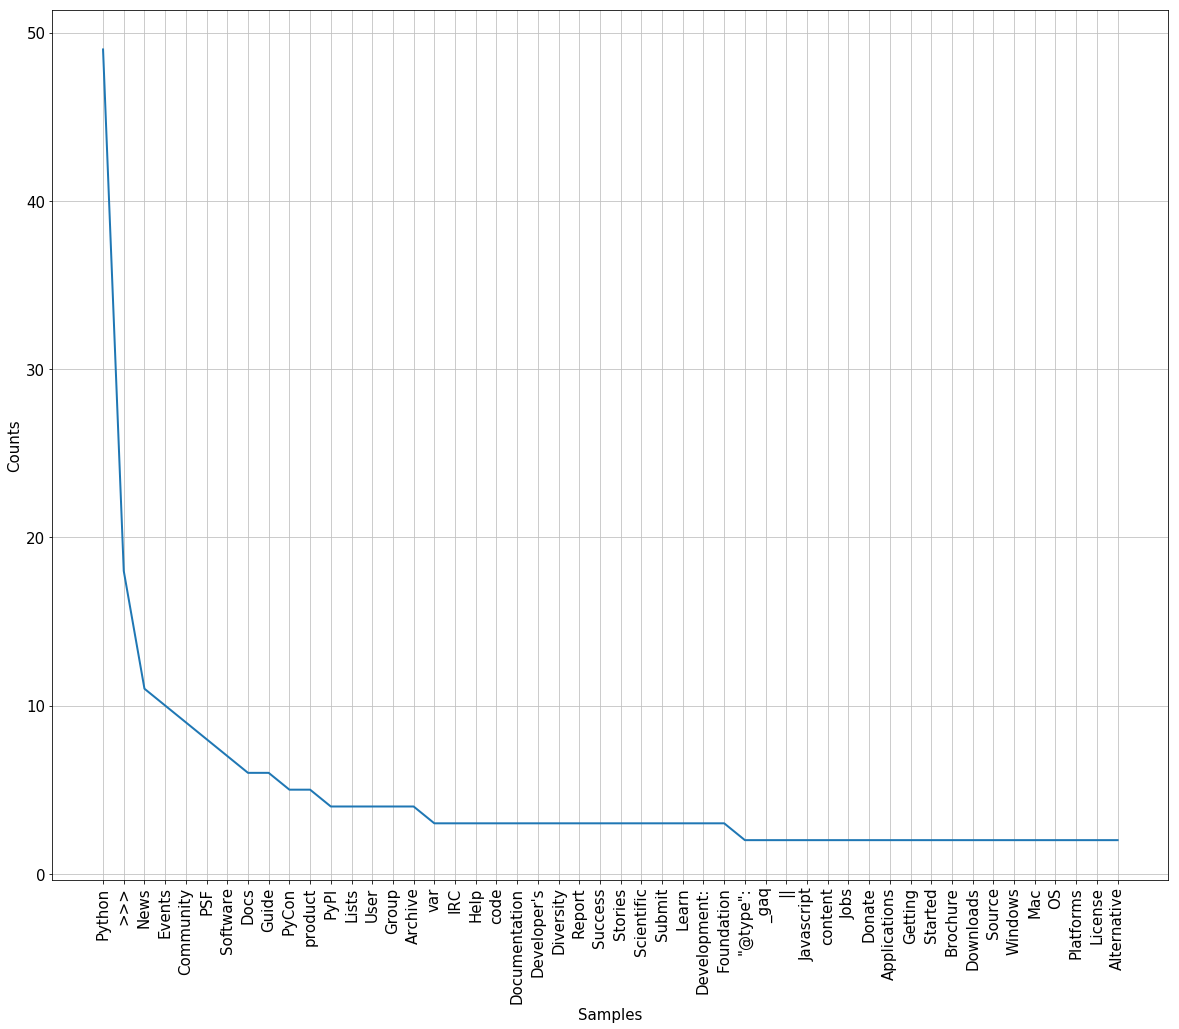

In [56]:
%matplotlib inline
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16) #그래프 가로,세로 사이즈
plt.rcParams["font.size"]=15 #폰트 사이즈

res=urllib.request.urlopen("http://python.org") # url에 접속
html=res.read() # 원격 리소스를 읽어옴

tokens=re.split("\W+",html.decode("utf-8")) #특수문자 제거,인코딩설정
#print(tokens)
clean=BeautifulSoup(html,"html.parser").get_text() #텍스트 내용
tokens=[token for token in clean.split()] #단어 리스트
#print(tokens)
stop=set(stopwords.words("english")) #불용어 사전
# 글자수가 1보다 크고 불용어가 아닌 단어들
clean_tokens=[token for token in tokens
  if len(token.lower())>1 and (token.lower() not in stop)]
tagged=nltk.pos_tag(clean_tokens) #품사 태깅
#명사와 고유명사만 선택
allnoun=[word for word,pos in tagged if pos in ["NN","NNP"]]
#print(allnoun)
#단어의 출현빈도를 그래프로 출력
freq_result=nltk.FreqDist(allnoun)
freq_result.plot(50,cumulative=False)